# Mini Project

## 자전거 수요량 예측 데이터 분석  
https://www.kaggle.com/c/bike-sharing-demand



### 1. 가설 설정
데이터 분석 전에 데이터 간의 연관성에 대한 임의의 가설 설정하기

### 2. 데이터 시각화 
4종류 이상의 시각화 기법을 사용하여 그래프 그리기
Seaborn 라이브러리 활용

### 3. 데이터 분석
각 그래프로부터 얻을 수 있는 의미 도출

### 4. 최초의 가설 검정
가설이 유의미한지 여부 판단하기

### 데이터 불러오기 및 파싱

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# 읽어드릴 파일 경로 : /dataset/bike_sharing_demand_train.csv
filepath = "./dataset/bike_sharing_demand_train.csv"
data = pd.read_csv(filepath)

In [4]:
data['datetime'] = data['datetime'].astype('datetime64')

In [5]:
data['year'] = data['datetime'].dt.year
data['month'] = data['datetime'].dt.month
data['day'] = data['datetime'].dt.day
data['hour'] = data['datetime'].dt.hour
data['minute'] = data['datetime'].dt.minute
data['second'] = data['datetime'].dt.second

In [6]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

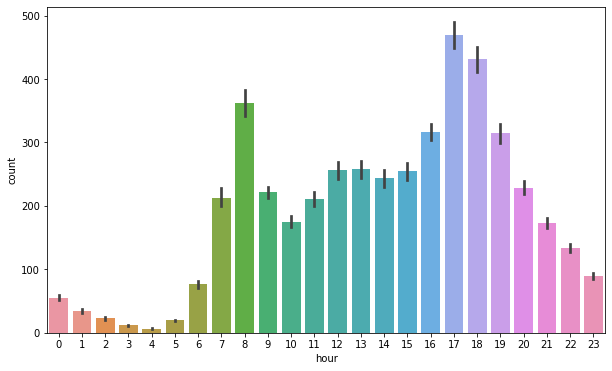

In [8]:
plt.figure(figsize=(10, 6))
g1 = sns.barplot(x='hour',y='count',data=data)

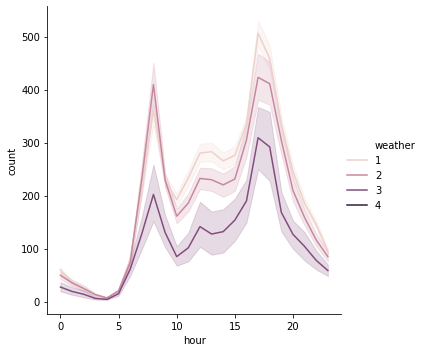

In [9]:
g2 = sns.relplot(x="hour", y="count", hue="weather", kind="line", data=data);

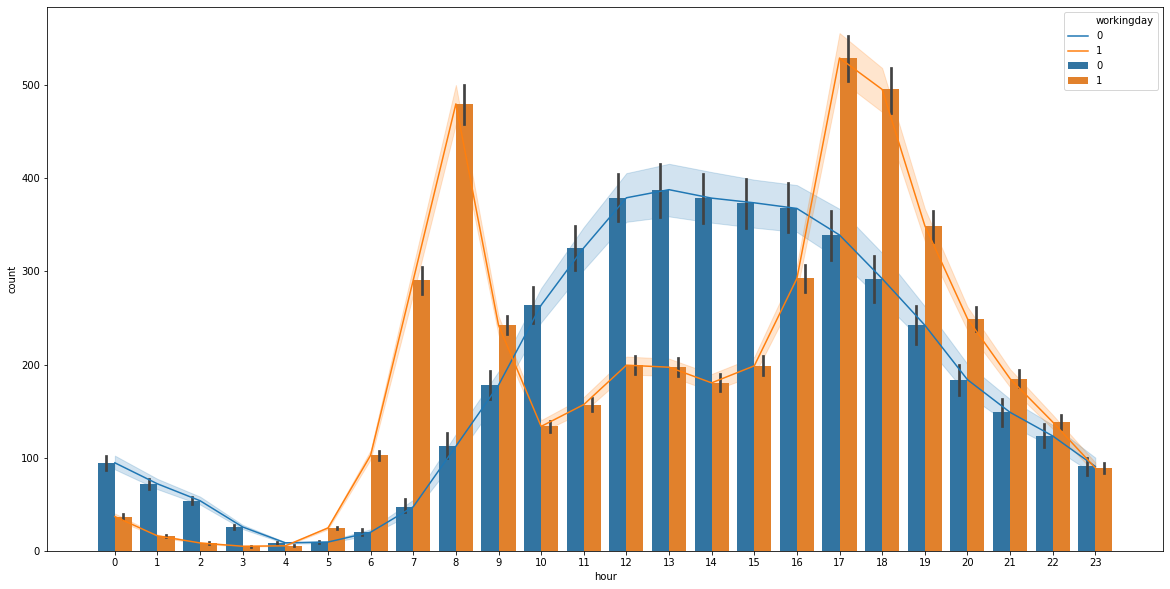

In [13]:
plt.figure(figsize=(20,10))
sns.barplot(x="hour", y = 'count' , hue='workingday', data = data)
sns.lineplot(x="hour", y = 'count' , hue='workingday', data = data)

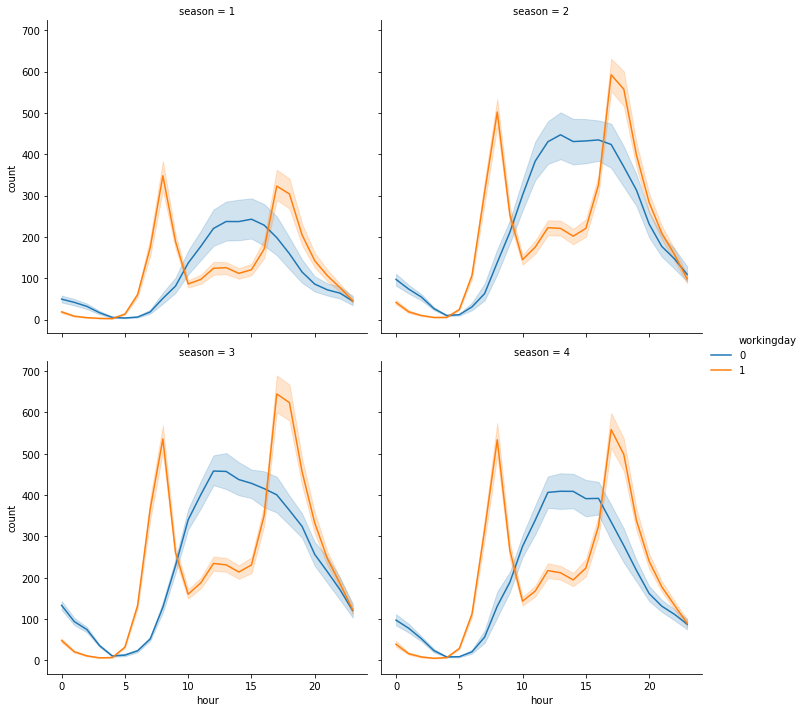

In [10]:
g4 = sns.relplot(x="hour", y="count",col="season",hue = "workingday", col_wrap=2, kind="line", data=data);

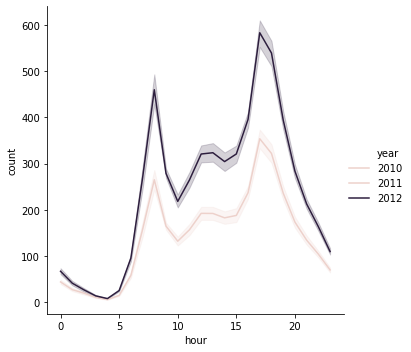

In [14]:
g5 = sns.relplot(x="hour", y="count", hue="year", kind="line", data=data);

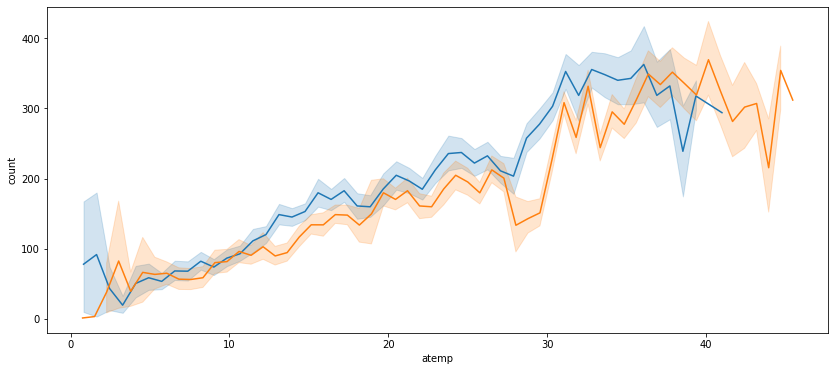

In [19]:
plt.figure(figsize=(14,6))
temp = sns.lineplot(x = data['temp'], y = 'count', data = data)
temp = sns.lineplot(x = data['atemp'], y = 'count', data = data)

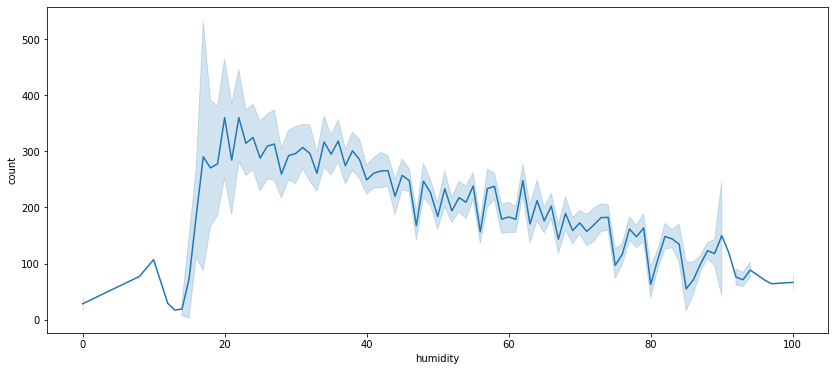

In [21]:
plt.figure(figsize=(14,6))
hum = sns.lineplot(x = data['humidity'], y = 'count', data= data)

### 결과
- 출근시간 보다 퇴근 시간에 자전거 대여량이 더 많다.
- 날씨별, 계절별, 연도별로 시간대 그래프를 그려보아도 퇴근 시간대가 출근 시간대보다 자전거 대여량이 더 많다.
- 단 주말에는 위 분포를 따르지 않는다.
- 날씨가 매우 좋지 않은 날에는 자전거를 대여한 사람이 한 명도 없다.
- 체감 온도와 실제 온도가 높을수록 자전거 대여량이 많아진다.
- 단, 습도가 높아질수록 자전거의 대여량은 줄어든다.